# Regression

In the previous chapter, you made use of image and political datasets to predict binary as well as multiclass outcomes. But what if your problem requires a continuous outcome? Regression, which is the focus of this chapter, is best suited to solving such problems. You will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.

## Intro to regression

- target value is a *continously varyng variabe * such as country GDP or the price of a house
- we will use Boston housing dataset


In [1]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')
boston = pd.read_csv('boston.csv')

In [2]:
(dir(datasets))  # list all the methods in the class

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_svmlight_format',
 'base',
 'california_housing',
 'clear_data_home',
 'covtype',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'kddcup99',
 'lfw',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank

In [3]:
bos = datasets.load_boston()
bos.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [4]:
plt.style.use('fivethirtyeight')

## Boston Housing data

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NX         506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Creating feature and target arrays

### Drop the target
- `X = boston.drop('MEDV', axis=1).values`: np.array of the dataframe minus 'MEDV'column

### Only the target
- `y = boston['MEDV'].values`: np.array of the column 'MEDV'


In [8]:
boston['MEDV'].head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [9]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

In [10]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [11]:
X.shape

(506, 13)

- `X[0]` CRIM
- `X[1]` ZN
- `X[2]` INDUS
- `X[3]` CHAS
- `X[4]` NX
- `X[5]` RM
- `X[6]` AGE
- `X[7]` DIS
- `X[8]` RAD
- `X[9]` TAX
- `X[10]` PTRATIO
- `X[11]` B
- `X[12]` LSTAT

## Predict house value from a single feature

 #### Average number of rooms in a block
 
 - slice out the number of rooms column 5th column
 -  apply `.reshape` method to keep the first dimension, but add another dimesion of size one to $X$

In [12]:
X_rooms = X[:,5]  #rm

type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [13]:
X_rooms.shape

(506,)

In [14]:
y.shape

(506,)

In [15]:
y = y.reshape(-1,1)

X_rooms = X_rooms.reshape(-1,1)

In [16]:
X_rooms.shape

(506, 1)

In [17]:
y.shape

(506, 1)

### Plotting house values vs. number of rooms

#### Plot house value as a function of number of rooms


##### Result:
- more rooms lead to higher prices

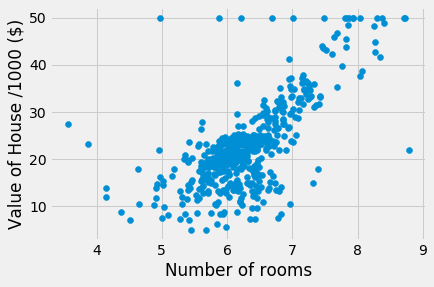

In [18]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of House /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

# Fitting a regression model

- use a model called linear regression

### Steps
0. import numpy, linear_model
0. instatiate LinearRegression as regr `reg = linear_model.LinearRegression()`
0. fit the regression to the data using `.fit()` and passing in thedata, the num of rooms and the target variable( house price)`reg.fit(X_rooms, y)`
0. check out the regdression predictions over the range of teh data, using np.linspace between the max and min num of rooms and make  apredition for this data  `prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)`
0. plot                               
                               
                           
```python
# import libraries
import numpy as np
from sklearn import linear_model


# instatiate LinearRegression as regr
reg = linear_model.LinearRegression()

# fit the regression to the data using `.fit()`
reg.fit(X_rooms, y)

#  check out the regdression predictions over the range of the data
# using np.linspace  betw max & min  num of rooms
prediction_space = np.linspace(min(X_rooms),
                               max(X_rooms)).reshape(-1,1)
# plot
plt.scatter(X_rooms, y, color='blue')

plt.plot(prediction_space, reg.predict(prediction_space),
        color='black',
        linewidth=3)
plt.ylabel('Value of House /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()
```

In [19]:
import numpy as np
from sklearn import linear_model

reg = linear_model.LinearRegression()

In [20]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
prediction_space = np.linspace(min(X_rooms),
                               max(X_rooms)).reshape(-1,1)

In [23]:
prediction_space

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082],
       [4.09355102],
       [4.20006122],
       [4.30657143],
       [4.41308163],
       [4.51959184],
       [4.62610204],
       [4.73261224],
       [4.83912245],
       [4.94563265],
       [5.05214286],
       [5.15865306],
       [5.26516327],
       [5.37167347],
       [5.47818367],
       [5.58469388],
       [5.69120408],
       [5.79771429],
       [5.90422449],
       [6.01073469],
       [6.1172449 ],
       [6.2237551 ],
       [6.33026531],
       [6.43677551],
       [6.54328571],
       [6.64979592],
       [6.75630612],
       [6.86281633],
       [6.96932653],
       [7.07583673],
       [7.18234694],
       [7.28885714],
       [7.39536735],
       [7.50187755],
       [7.60838776],
       [7.71489796],
       [7.82140816],
       [7.92791837],
       [8.03442857],
       [8.14093878],
       [8.24744898],
       [8.35395918],
       [8.46046939],
       [8.566

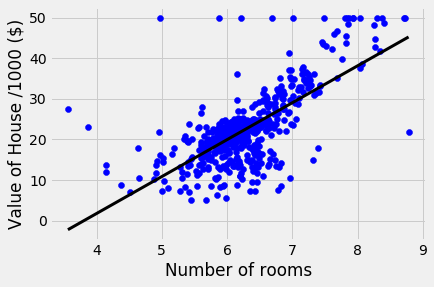

In [24]:
# plot
plt.scatter(X_rooms, y, color='blue')

plt.plot(prediction_space, 
         reg.predict(prediction_space),
         color='black',linewidth=3)


plt.ylabel('Value of House /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

# Let's practice

## Importing data for supervised learning
In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

INSTRUCTIONS
100XP
- Import numpy and pandas as their standard aliases.
- Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
- Create array X for the 'fertility' feature and array y for the 'life' target variable.
- Reshape the arrays by using the .reshape() method and passing in (-1, 1).

In [25]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Great work! Notice the differences in shape before and after applying the .reshape() method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

## Exploring the Gapminder data
As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as df and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as `.info(), .describe(), .head()`.

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where `df.corr()` computes the pairwise correlation between columns:

`sns.heatmap(df.corr(), square=True, cmap='RdYlGn')`

Once you have a feel for the data, consider the statements below and select the one that is **not true**. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!
![](https://i.imgur.com/oxAh8hX.png)

---
INSTRUCTIONS

A. The DataFrame has `139` samples (or rows) and `9` columns.

B. `life` and `fertility` are negatively correlated.

C. The mean of `life` is `69.602878`.

- D.`fertility` is of type `int64`.

E. `GDP` and `life` are positively correlated.

---

Good job! As seen by using df.info(), fertility, along with all the other columns, is of type float64, not int64.

# The basics of linear regression

## Regression mechanics

We want to fit a line to the data, and a line in two dimensions is always of the form:

- $y=ax+b$
    - $y$ = target
    - $x$ = single feature
    - $a,b$ = parameters of model that we want to learn.
    
    
- How do we choose $a$ and $b$?

#### common method

- Define an error functions for any given line
    - Choose the line tha tminimizes the error function

# The loss function
- Ordinary leas squares (OLS): minimize sum of squares of residuals


- minimize the bvertical distance between the fit and the data.
- calculate the vertical distance between it and the line called **Residual**
- Minimize the sum of the squares of the resuduals! will be our **loss function**

It is the same as minimiziing the mean square error of the prediciton on the training set

- When you call fit on a linear regdression model in sklearn , it performs this **OLS** under the hood
- 

![](https://i.imgur.com/x7arzDa.png)


# Linear regression in higher dimensions

$$
y = a_1x_1+ a_2x_2+b
$$
- to fit a linear regression model here:
    - need to specify 3 variables $a_1,a_2,b$
- in higher dimensions:

$$
y = a_1x1+a_2x_2+a_3x_3+a_nx_n+b
$$

- must specify coefficient for each feature and teh variable $b$


- scikit-learn APi works the same way
- pass two arrays:`Features`, and `target`

# Linear regression on all features
- all the features from the boston housing data
- split into train, and test set
- instatiate the regressor
- fit the regressor on the training set
- and predict on the test set.

- mThe defautl scoring method for linear regdression is called **R squared**, it quantifies the amount of variance in the target variable tha tis predicted form the feature variables.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

reg_all = linear_model.LinearRegression()

reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test,y_test)  # R square,
# NEVER  use out of the box!

0.7298987360907498

# Let's practice

## Fit & predict for regression
Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2 score using sckit-learn's .score() method.

--- 

INSTRUCTIONS
100XP
- Import LinearRegression from sklearn.linear_model.
- Create a LinearRegression regressor called reg.
- Set up the prediction space to range from the minimum to the maximum of X_fertility. This has been done for you.
- Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
- Compute and print the R2 score using the .score() method.
- Overlay the plot with your linear regression line. This has been done for you, so hit 'Submit Answer' to see the result!

0.6192442167740035


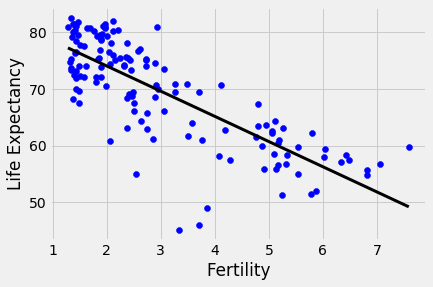

In [29]:
X_fertility = X
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility, y, color='blue')

plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

Fantastic! Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

## Train/test split for regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

INSTRUCTIONS
100XP
- Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
- Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
- Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
- Compute and print the R2 score using the .score() method on the test set.
- Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().

In [ ]:
df.head()

In [31]:
'''
needed to match video
drops columns 'life' witch is our target, and Region bc its not continous
'''
cols = ['life', 'Region']
X= df.drop(cols, axis=1).values
X.shape

(139, 8)

In [32]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430053
Root Mean Squared Error: 3.247601080037028


Excellent! Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it? You'll learn about this as well how to better validate your models in the next video!

# Cross-validation
## Cross-validation motivation
- model performance is dependent on way the data is split
- not representative of teh model's ability to generalize
- solution: Cross-validation!

## Cross-validation basics
split the dataset into five groups or folds


### Hold First Fold
- Hold out the firs tfold as a test set
    - $\text{Fold 1}=\text{Test Data}$
- Fit our model on the remaining four folds and predict the test, and compute the metric of intrest
    - $[ \text{Fold 2, Fold 3, Fold 4, Fold 5} ]=\text{Training Data}$
    - $\text{Metric 1}$

### Hold Second Fold
- Hold out the Second fold as a test set
    - $\text{Fold 2}=\text{Test Data}$
- Fit our model on the remaining four folds and predict the test, and compute the metric of intrest
    - $[ \text{Fold 1, Fold 3, Fold 4, Fold 5} ]=\text{Training Data}$
    - $\text{Metric 2}$

### Hold Third Fold
- Hold out the Third fold as a test set
    - $\text{Fold 3}=\text{Test Data}$
- Fit our model on the remaining four folds and predict the test, and compute the metric of intrest
    - $[ \text{Fold 1, Fold 2, Fold 4, Fold 5} ]=\text{Training Data}$
    - $\text{Metric 3}$


### Hold Fourth Fold
- Hold out the Third fold as a test set
    - $\text{Fold 4}=\text{Test Data}$
- Fit our model on the remaining four folds and predict the test, and compute the metric of intrest
    - $[ \text{Fold 1, Fold 2, Fold 3, Fold 5} ]=\text{Training Data}$
    - $\text{Metric 4}$


### Hold Fifth Fold
- Hold out the Third fold as a test set
    - $\text{Fold 5}=\text{Test Data}$
- Fit our model on the remaining four folds and predict the test, and compute the metric of intrest
    - $[ \text{Fold 1, Fold 2, Fold 3, Fold 4} ]=\text{Training Data}$
    - $\text{Metric 5}$

![](https://i.imgur.com/fkNoVVP.png)

### Result

We get five values of $R^2$ from which we can compute statistics of intrest such as the  mean and median and 95% confidence intervals




## cross-validation and model performance





- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV

#### Tradeoff
- more folds = More computationally expensive.
This method avoid the problem of you metric of choise being dependent on  the train test split




## Cross-validaiton inscikit-learn

In [33]:
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()

# regressor, feature data, target data, number of folds
#returns an array of cross-validaiton scores, 
cv_results = cross_val_score(reg,X,y,cv=5)
# the length of the array is the number of folts utilized
print(cv_results)  # R square, default score of linear regression

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [34]:
np.mean(cv_results)

0.8599627722793407

# Let's practice

## 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectively.

INSTRUCTIONS
100XP
- Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
- Create a linear regression regressor called reg.
- Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
- Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.

In [35]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793407


Great work! Now that you have cross-validated your model, you can more confidently evaluate its predictions.

## K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:
 ```python
%timeit cross_val_score(reg, X, y, cv = ____)
```
pandas and numpy are available in the workspace as pd and np. The DataFrame has been loaded as df and the feature/target variable arrays X and y have been created.

INSTRUCTIONS
100XP
- Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
- Create a linear regression regressor called reg.
- Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.

In [36]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.8718712782621969
0.8436128620131159


In [37]:
%timeit cvscores_3 = cross_val_score(reg,X,y,cv=3)

4.1 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%timeit cvscores_10 = cross_val_score(reg,X,y,cv=10)

12.4 ms ± 332 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Excellent! Did you use `%timeit` in the IPython Shell to see how much longer it takes 10-fold cross-validation to run compared to 3-fold cross-validation?

# Regularized Regression

## RECALL:

Fitting a linear regression does is minimize a loss function to choose a coefficient $a_i$ for each feature variable

## Why Regularize? Too many features..
- recall: linear regression minimize a loss function
- it chooses a coefficient for each feature variable
- large coefficients can lead to overfiiting
- penalizing large coefficients: Regularixations

## Ridge regression
OLS function plus the square value of each coefficient multiplied by some constant alpha

When minimizing the loss function to fit our data, models are penalized for coefficients with a large magnitude: large positvie and large negative coefficients

Alpha is a parameter we need to choose in order to fit and predict

Select the alpha  for which our model performs best.

- loss functions = OLS loss function + $\alpha * \sum^{n}_{i=1}a^2_i$
- Alpha: Parameter we need to choose
- Picking alpha here is similar to piching $k$ in k-NN
- Hyperparameter tuning 
- Alpha controls model complexity
    - $\alpha = 0$: We get back OLS( can lead to overfitting)
    - $\alpha = \text{high}$: large coefficients are singificantly penalized, leads to a model that is too simple and ends up underfitting the data.

## Ridge regression in scikit-learn

In [39]:
from sklearn.linear_model import Ridge

X_train,x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ridge = Ridge(alpha=0.1, normalize=True)  # normalized=true all our variables are on teh same scale 

ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.844246995997575

## Lasso regression
Loss function

$$
\text{OLS loss function} + \alpha * \sum^{n}_{i=1}|a_i|
$$


## Lasso regression in scikit-learn

In [40]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

lasso.score(X_test,y_test)

0.8721296169613538

## Lasso regression for feature selection
- can be used to select **important featuers** of a dataset
- shricks the coefficietns of less important features to exacly 0

## Lasso for features selection in sciki-learn

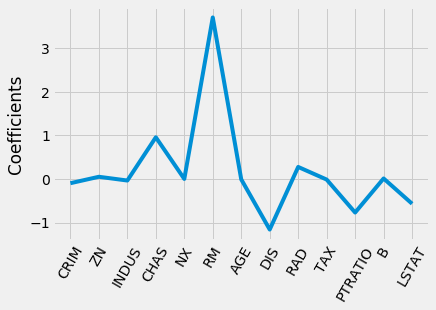

In [42]:
from sklearn.linear_model import Lasso
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values
names = boston.drop('MEDV', axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X,y).coef_  # extract the coef attribute


# plot the coefficientrs as a function of feature names 
_ = plt.plot(range(len(names)), lasso_coef)

_ = plt.xticks(range(len(names)), names, rotation=60)

_ = plt.ylabel('Coefficients')

plt.show()

### The most imortant predictor for our target variable, housing price is number of rooms!

- This type of feature selection is very importan t for machine learning in an industry or buisness
- allows you to comunicate important results to non-technical colleages.
- The power of reporting important features from a linear models cannot be overestimated.
- valuable in reasearch science, in order to identify wich factors are important predictions for varius physical phoenomena.

# Let's practice

## Regularization I: Lasso
In the video, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as X and y.

INSTRUCTIONS
100XP
- Import Lasso from sklearn.linear_model.
- Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
- Fit the regressor to the data and compute the coefficients using the coef_ attribute.
- Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you, so hit 'Submit Answer' to view the plot!


In [56]:
df_columns = ['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP','BMI_female', 'child_mortality',]

AttributeError: 'list' object has no attribute 'values'

In [58]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
#X = df['fertility'].values

cols = ['life', 'Region']
X= df.drop(cols, axis=1).values

# Reshape X and y
#y = y.reshape(-1,1)
#X = X.reshape(-1,1)

In [51]:
X.shape

(139, 8)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


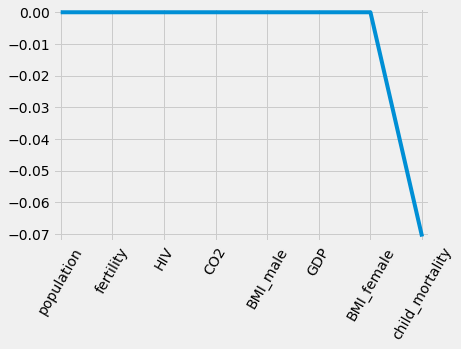

In [62]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.02)
plt.show()


Great work! According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

## Regularization II: Ridge
Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha:

In [65]:

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the R2 score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.

---

- Instantiate a Ridge regressor and specify normalize=True.
Inside the for loop:
- Specify the alpha value for the regressor to use.
- Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays X and y.
- Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as np.
- Use the display_plot() function to visualize the scores and standard deviations.

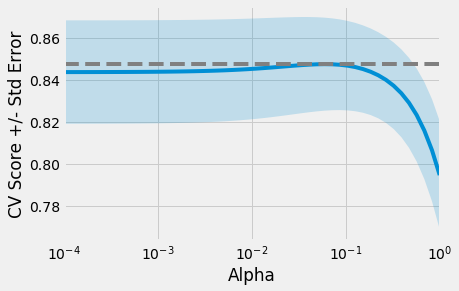

In [66]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Great work! Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? You'll learn all about this in the next chapter!

You have finished the chapter "Regression"!